In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Forming image dataset from BING

In [ ]:
cd /content/drive/MyDrive/DL_Projects/CNN/TASK /Images

/content/drive/MyDrive/DL_Projects/CNN/TASK /Images


In [ ]:
from bing_image_downloader import downloader
downloader.download("iron man", limit=500,  output_dir='iron_man')

In [ ]:
downloader.download("black widow hero", limit=2000,  output_dir='Images')

In [ ]:
downloader.download("Hulk Movie", limit=500,  output_dir='Images')

In [ ]:
downloader.download("Thor Legend", limit=500,  output_dir='Images')

### Importing the libraries

In [128]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from google.colab.patches import cv2_imshow

# PART 1: DATA PREPROCESSING

Preprocessing the Training set

In [129]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DL_Projects/CNN/TASK /Images/Training set',
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2306 images belonging to 4 classes.


Preprocessing the Testing set

In [130]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DL_Projects/CNN/TASK /Images/Testing set',
                                            target_size = (256,256), # Size to resize images to after they are read from disk
                                            batch_size = 32,        # Size of the batches of data. Default: 32.
                                            class_mode = 'categorical')  

Found 484 images belonging to 4 classes.


# PART2: BUIDING CNN

Initializing CNN

## Step 1 - Convolution

In [131]:
cnn=tf.keras.models.Sequential()

In [132]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(256,256, 3)))

## Step 2 - Pooling

In [133]:
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))

Adding a second convolutional layer

In [134]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))

## Step 3 - Flattening

In [135]:
cnn.add(tf.keras.layers.Flatten())

## Step 4 - Fully Connected Layer

In [136]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

## Step 5 - Output Layer

In [137]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# PART 3: TESTING CNN

Compiling the CNN

In [138]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
hist = cnn.fit(x=training_set, epochs=5, validation_data=test_set)

Epoch 1/5
73/73 [==============================] - 159s 2s/step - loss: -839029.5625 - accuracy: 0.3131 - val_loss: 11391667.0000 - val_accuracy: 0.2500


## Plot accuracy and losses

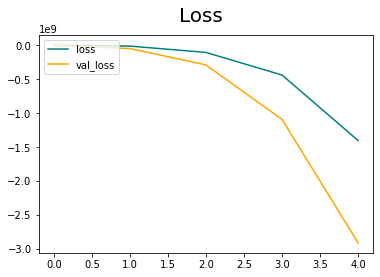

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# PART 5: TESTING ON UNKNOWN IMAGE

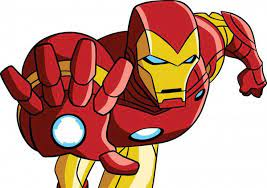

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DL_Projects/CNN/TASK /download.jpg')
cv2_imshow(img)


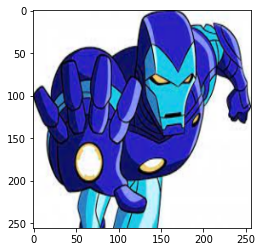

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:

pred = cnn.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 87ms/step


In [ ]:
pred

array([[1.]], dtype=float32)